In [120]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

In [32]:
sns.set_style('whitegrid')
sns.set_palette('pastel')
palette = sns.color_palette("Greens", n_colors=8)
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[palette[3]])

In [134]:
train_ohs = pd.read_csv(Path('..','adults_data','adults_ohs_train.csv'))
test_ohs = pd.read_csv(Path('..','adults_data','adults_ohs_test.csv'))

train_ohn = pd.read_csv(Path('..','adults_data','adults_ohn_train.csv'))
test_ohn = pd.read_csv(Path('..','adults_data','adults_ohn_test.csv'))

In [4]:
corr_df = train_ohs.corr()

# find maximum values of correlation
max_10_corrs = pd.Series(corr_df.stack().unique()).nlargest(10).round(6)
max_corrs = max_10_corrs.values
max_corrs

min_10_corrs = pd.Series(corr_df.stack().unique()).nsmallest(10).round(6)
min_corrs = min_10_corrs.values
min_corrs

def correlated_variables(df, value):
    result = df.isin([value])
    locations = result[result].stack().index.tolist()
    for row, col in locations:
        print(value, "   ", row, "   ", col)
        
[correlated_variables(corr_df.round(6), val) for val in max_corrs[1:3]]
[correlated_variables(corr_df.round(6), val) for val in min_corrs[1:5]]       

0.896033     marital-status_Married-civ-spouse     relationship_Husband
0.896033     relationship_Husband     marital-status_Married-civ-spouse
0.581697     relationship_Husband     sex_Male
0.581697     sex_Male     relationship_Husband
-0.792243     race_Black     race_White
-0.792243     race_White     race_Black
-0.646039     marital-status_Married-civ-spouse     marital-status_Never-married
-0.646039     marital-status_Never-married     marital-status_Married-civ-spouse
-0.581697     relationship_Husband     sex_Female
-0.581697     sex_Female     relationship_Husband
-0.579587     marital-status_Never-married     relationship_Husband
-0.579587     relationship_Husband     marital-status_Never-married


[None, None, None, None]

In [ ]:
def custom_round

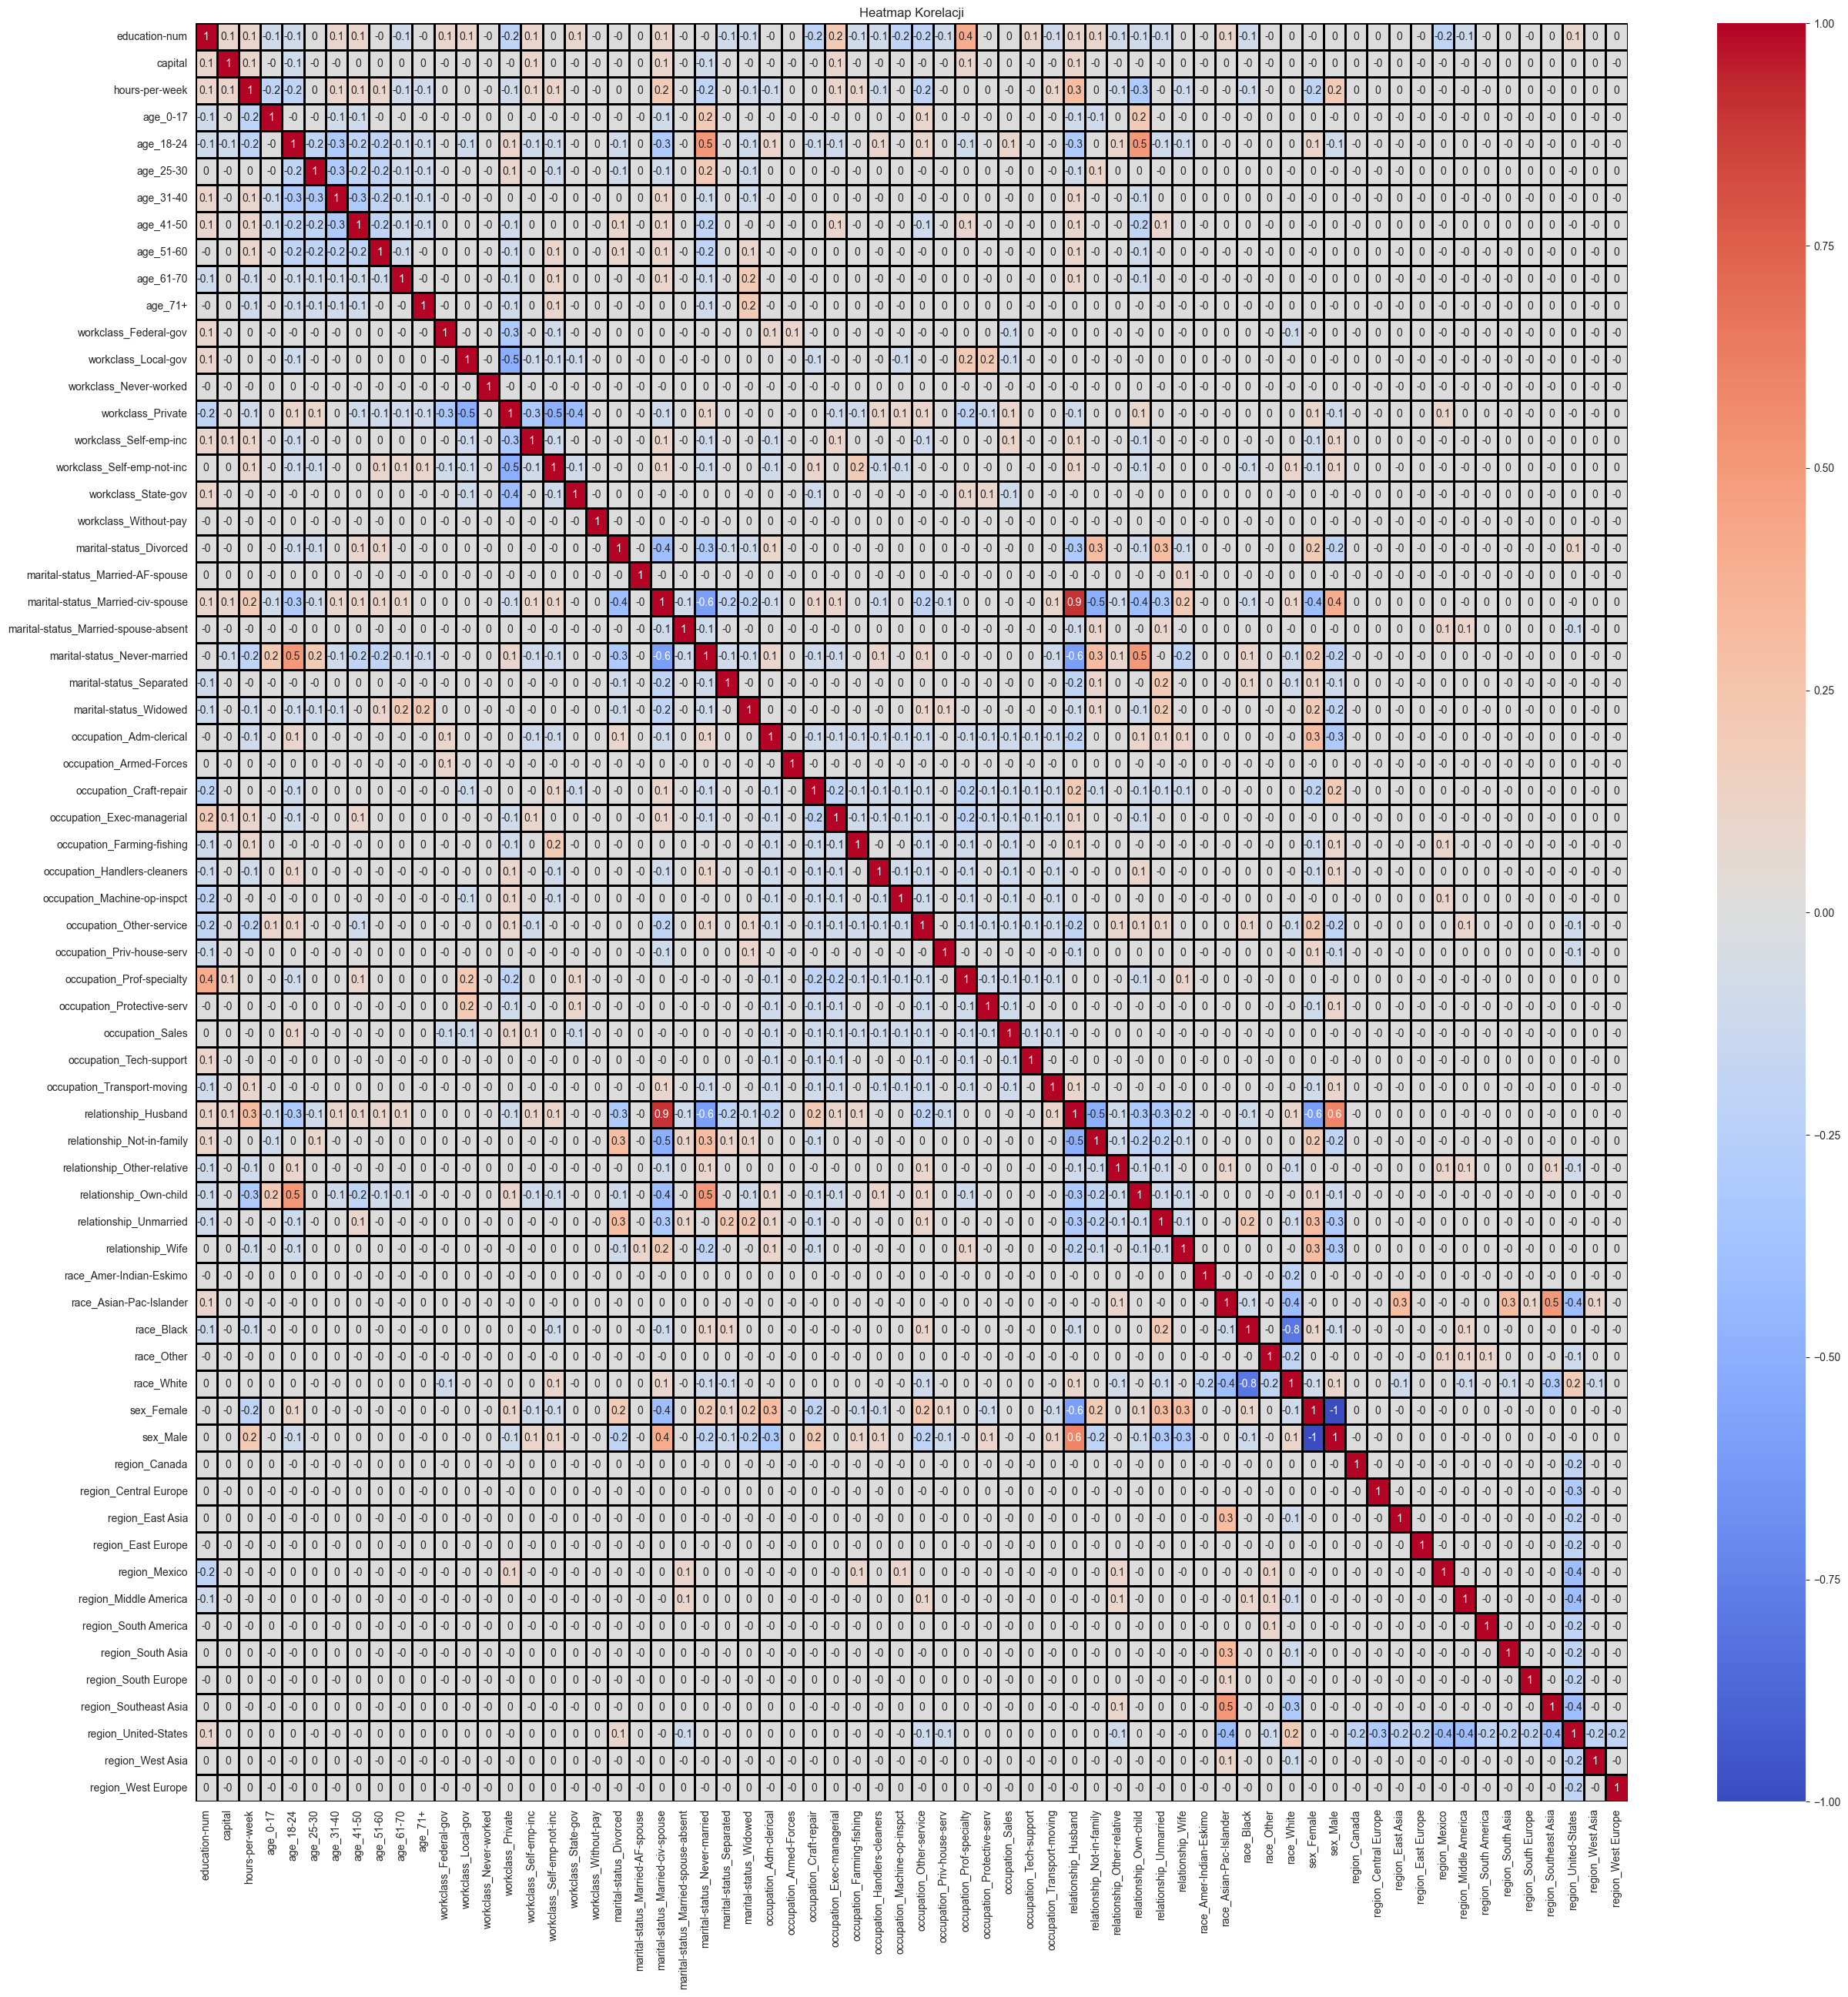

In [147]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(1), annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.title('Heatmap Korelacji')
plt.savefig(Path('..','plots',f'corr_mtrx.pdf'), 
                format='pdf', bbox_inches='tight')


In [148]:
def reduce_by_PCA(train, test, standard_type):
    
    label_fontsize = 18
    tick_fontsize = 13
    
    pca = PCA()
    pca.fit(train)
    
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = explained_variance.cumsum()
    
    plt.figure(figsize=(10, 6))
    x_axis = range(1, len(cumulative_variance) + 1)
    plt.plot(x_axis, cumulative_variance, marker='o', linestyle='--', color=palette[5], label='Cumulative Explained Variance')
    plt.plot(x_axis, [0.9] * len(x_axis), color='red', linestyle='--', label='90% Explained Variance')
    plt.plot(x_axis, [0.95] * len(x_axis), color='blue', linestyle='--', label='95% Explained Variance')
    #plt.title('Cumulative Explained Variance by Principal Components')
    plt.xlabel('Number of Principal Components', 
                fontsize=label_fontsize)
    plt.ylabel('Cumulative Explained Variance', 
                fontsize=label_fontsize)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.tick_params(axis='both', labelsize=tick_fontsize)
    plt.savefig(Path('..','plots',f'PCA_lines_{standard_type}.pdf'), 
                format='pdf', bbox_inches='tight')
    plt.show()
    
    k_90 = next(i for (i, var) in enumerate(cumulative_variance) if var >= 0.90) + 1
    k_95 = next(i for (i, var) in enumerate(cumulative_variance) if var >= 0.95) + 1
    
    print('90% '+str(k_90), '95% '+str(k_95))
    
    optimal_PCA = PCA(n_components=k_95)
    reduced_train = pd.DataFrame(optimal_PCA.fit_transform(train))  
    reduced_train.to_csv(Path('..','adults_data',
                              f'PCA_{standard_type}_train.csv'))
    reduced_test = optimal_PCA.transform(test)
    reduced_test_df = pd.DataFrame(reduced_test)
    reduced_test_df.to_csv(Path('..','adults_data',
                             f'PCA_{standard_type}_test.csv'))
    
    explained_variance_test = np.var(reduced_test, axis=0) / np.sum(np.var(test, axis=0))
    explained_variance_test_ratio = np.cumsum(explained_variance_test)
    print(f'Explained variance of a test set is {explained_variance_test_ratio[k_90-1]}.')
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, k_95 + 1), explained_variance[:k_95], color=palette[2], alpha=0.7, label='Explained Variance')
    plt.step(range(1, k_95 + 1), cumulative_variance[:k_95], where='mid', color=palette[5], linestyle='--', label='Cumulative Explained Variance')
    #plt.title('Explained Variance by Principal Components')
    plt.xlabel('Principal Component', 
                fontsize=label_fontsize)
    plt.ylabel('Explained Variance Ratio', 
                fontsize=label_fontsize)
    plt.grid(True)
    plt.legend()
    plt.tick_params(axis='both', labelsize=tick_fontsize)
    plt.tight_layout()
    plt.savefig(Path('..','plots',f'PCA_steps_{standard_type}.pdf'), 
                format='pdf', bbox_inches='tight')
    plt.show()

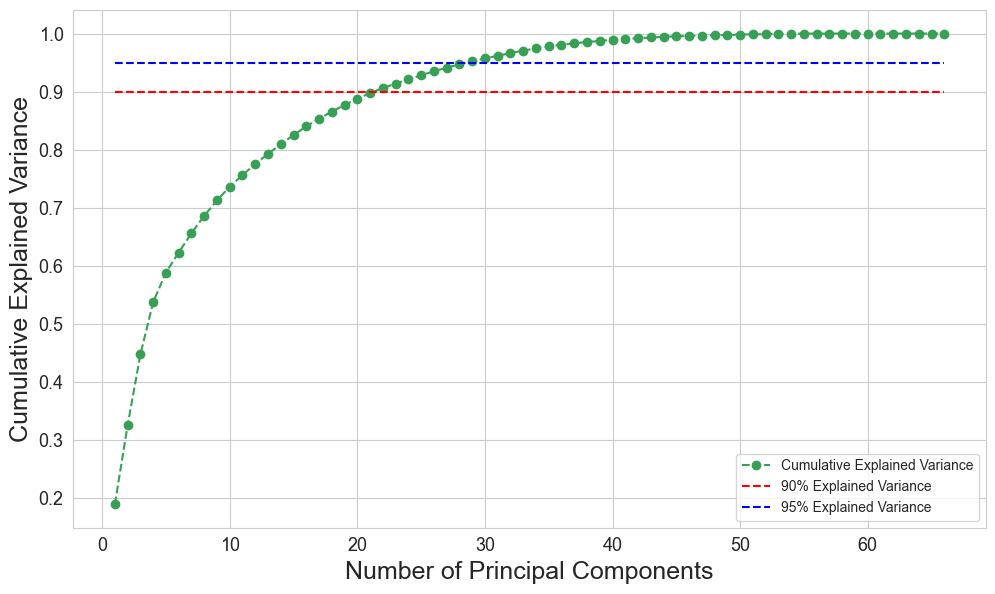

90% 22 95% 29
Explained variance of a test set is 0.9033617802264957.


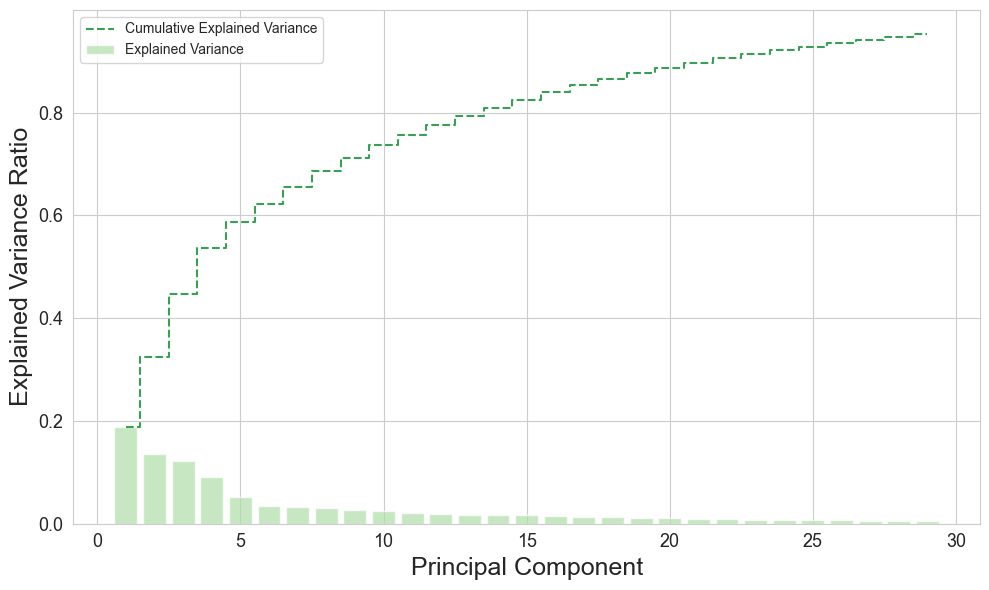

In [149]:
reduce_by_PCA(train_ohs, test_ohs, 'ohs')